## Final Project on Yelp datasets

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
#importing yelp_academic_dataset_review dataset
yelp_review_df = pd.read_csv('yelp_academic_dataset_review.csv')

In [3]:
#showing the columns of yelp_academic_dataset_review
yelp_review_df.columns

Index(['business_id', 'cool', 'date', 'funny', 'review_id', 'stars', 'text',
       'useful', 'user_id'],
      dtype='object')

In [4]:
yelp_review_df.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,iCQpiavjjPzJ5_3gPD5Ebg,0,2011-02-25,0.0,x7mDIiDB3jEiPGPHOmDzyw,2.0,The pizza was okay. Not the best I've had. I p...,0.0,msQe1u7Z_XuqjGoqhB0J5g
1,pomGBqfbxcqPv14c3XH-ZQ,0,2012-11-13,0.0,dDl8zu1vWPdKGihJrwQbpw,5.0,I love this place! My fiance And I go here atl...,0.0,msQe1u7Z_XuqjGoqhB0J5g
2,jtQARsP6P-LbkyjbO1qNGg,1,2014-10-23,1.0,LZp4UX5zK3e-c5ZGSeo3kA,1.0,Terrible. Dry corn bread. Rib tips were all fa...,3.0,msQe1u7Z_XuqjGoqhB0J5g
3,elqbBhBfElMNSrjFqW3now,0,2011-02-25,0.0,Er4NBWCmCD4nM8_p1GRdow,2.0,Back in 2005-2007 this place was my FAVORITE t...,2.0,msQe1u7Z_XuqjGoqhB0J5g
4,Ums3gaP2qM3W1XcA5r6SsQ,0,2014-09-05,0.0,jsDu6QEJHbwP2Blom1PLCA,5.0,Delicious healthy food. The steak is amazing. ...,0.0,msQe1u7Z_XuqjGoqhB0J5g


In [14]:
#Doing the valuecounts on business_id to find the unique businesses
business_id_counts = yelp_review_df['business_id'].value_counts().reset_index()
business_id_counts.columns = ['business_id', 'count']
business_id_counts.head()


,business_id,count
0,4JNXUYY8wbaaDmk3BPzlWw,7968
1,RESDUcs7fIiihp38-d6_6g,7861
2,K7lWdNUhCbcnEvI0NhGewg,6447
3,cYwJA2A6I12KNkm2rtXd5g,5472
4,f4x1YBxkLrZg652xt2KR5g,5382


In the above output we could see that business_id's of all entries are encrypted to 22 characters. but there are some wrong values which can possibly be the user experience which is not the correct. So lets check the value count using string length of business_id.

In [15]:
business_id_length_counts = yelp_review_df['business_id'].apply(lambda x: len(str(x))).value_counts().reset_index()
business_id_length_counts.columns = ['business_id_length', 'count']

# checking the length of each business id
print(business_id_length_counts)

   business_id_length    count
0                  22  5996996
1                 152        1
2                 235        1


Assuming that bussiness IDs are encrypted to In the above output it is clear that there are two rows where the string length is more than 22 charcaters which should be wrong data. So I'm dropping these two Rows.

In [16]:
#creating a new df after considering only 22 charactered business ids
yelp_review_df1 = yelp_review_df[yelp_review_df['business_id'].apply(lambda x: len(str(x))) == 22]

business_id_length_counts = yelp_review_df1['business_id'].apply(lambda x: len(str(x))).value_counts().reset_index()
business_id_length_counts.columns = ['business_id_length', 'count']

# Verify the changes
print(business_id_length_counts)

   business_id_length    count
0                  22  5996996


## Question 1

**Do businesses with more reviews tend to have higher ratings?**

In [18]:
yelp_review_df1['business_id'].nunique()

188593

From the above output we could see that a total of 188593 unique business are available in the dataset.

In [19]:
# grouping the business_id and calculate average rating and review count for each business id
business_stats = yelp_review_df1.groupby('business_id').agg({'stars': 'mean', 'review_id': 'count'}).reset_index()
business_stats.columns = ['business_id', 'average_rating', 'review_count']
business_stats.head(5)

,business_id,average_rating,review_count
0,--1UhMGODdWsrMastO9DZw,4.041667,24
1,--6MefnULPED_I942VcFNA,3.128205,39
2,--7zmmkVg-IMGaXbuVd0SQ,3.870370,54
3,--8LPVSo5i0Oo61X01sV9A,3.500000,4
4,--9QQLMTbFzLJ_oT-ON3Xw,3.545455,11


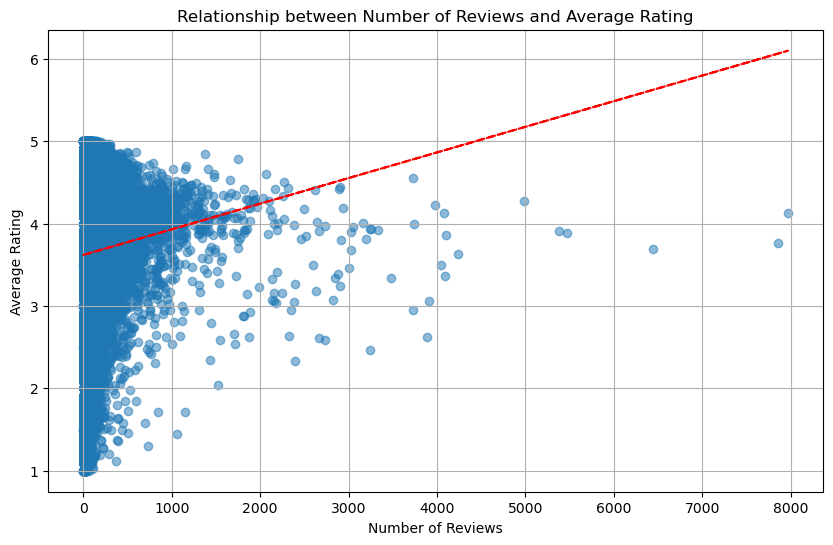

In [20]:
# scatter plot with the trend
plt.figure(figsize=(10, 6))
plt.scatter(business_stats['review_count'], business_stats['average_rating'], alpha=0.5)

#code for trend line
z = np.polyfit(business_stats['review_count'], business_stats['average_rating'], 1)
p = np.poly1d(z)
plt.plot(business_stats['review_count'], p(business_stats['review_count']), "r--", label='Trend Line')

# Other plot configurations
plt.title('Relationship between Number of Reviews and Average Rating')
plt.xlabel('Number of Reviews')
plt.ylabel('Average Rating')
plt.grid(True)
#plt.legend()
plt.show()

As per the above we could see that as the number of reviews increasing, average rating is increasing, that means we can assume that more reviews tends to higher ratings. Similar trend is denoted with the line plot. But there are some businesses where there reviews lessthan 1000 and average rating greater than 4.5

## Question 2

**Is there a difference in the rating distribution (stars) of food establishments
by state?**  
(Hint: use the categories variable to extract the records belonging to food
establishments - any place that someone could go to get a freshly prepared meal.)

In [21]:
#importing yelp_academic_dataset_business table
yelp_business_df = pd.read_csv('yelp_academic_dataset_business.csv')

In [22]:
print('Displaying the information about yelp_business_df dataframe:')
yelp_business_df.info()

Displaying the information about yelp_business_df dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188593 entries, 0 to 188592
Data columns (total 61 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   address                                180970 non-null  object 
 1   attributes                             0 non-null       float64
 2   attributes.AcceptsInsurance            11671 non-null   object 
 3   attributes.AgesAllowed                 397 non-null     object 
 4   attributes.Alcohol                     47892 non-null   object 
 5   attributes.Ambience                    47577 non-null   object 
 6   attributes.BYOB                        911 non-null     object 
 7   attributes.BYOBCorkage                 1409 non-null    object 
 8   attributes.BestNights                  6844 non-null    object 
 9   attributes.BikeParking                 84891 non-null   object 


In [23]:
yelp_business_df.head(5)

,address,attributes,attributes.AcceptsInsurance,attributes.AgesAllowed,attributes.Alcohol,attributes.Ambience,attributes.BYOB,attributes.BYOBCorkage,attributes.BestNights,attributes.BikeParking,attributes.BusinessAcceptsBitcoin,attributes.BusinessAcceptsCreditCards,attributes.BusinessParking,attributes.ByAppointmentOnly,attributes.Caters,attributes.CoatCheck,attributes.Corkage,attributes.DietaryRestrictions,attributes.DogsAllowed,attributes.DriveThru,attributes.GoodForDancing,attributes.GoodForKids,attributes.GoodForMeal,attributes.HairSpecializesIn,attributes.HappyHour,attributes.HasTV,attributes.Music,attributes.NoiseLevel,attributes.Open24Hours,attributes.OutdoorSeating,attributes.RestaurantsAttire,attributes.RestaurantsCounterService,attributes.RestaurantsDelivery,attributes.RestaurantsGoodForGroups,attributes.RestaurantsPriceRange2,attributes.RestaurantsReservations,attributes.RestaurantsTableService,attributes.RestaurantsTakeOut,attributes.Smoking,attributes.WheelchairAccessible,attributes.WiFi,business_id,categories,city,hours,hours.Friday,hours.Monday,hours.Saturday,hours.Sunday,hours.Thursday,hours.Tuesday,hours.Wednesday,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,1314 44 Avenue NE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,True,"{'garage': False, 'street': True, 'validated':...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,True,NaN,average,NaN,False,casual,NaN,False,True,2.0,True,NaN,True,NaN,NaN,NaN,Apn5Q_b6Nz61Tq4XzPdf9A,"Tours, Breweries, Pizza, Restaurants, Food, Ho...",Calgary,NaN,11:0-21:0,8:30-17:0,11:0-21:0,NaN,11:0-21:0,11:0-21:0,11:0-21:0,1,51.091813,-114.031675,Minhas Micro Brewery,NaN,T2E 6L6,24,4.0,AB
1,NaN,NaN,NaN,NaN,none,NaN,NaN,NaN,NaN,False,NaN,True,"{'garage': False, 'street': True, 'validated':...",NaN,True,NaN,NaN,NaN,True,False,NaN,True,"{'dessert': False, 'latenight': False, 'lunch'...",NaN,NaN,False,NaN,NaN,NaN,True,casual,NaN,False,True,2.0,False,False,True,NaN,True,no,AjEbIBw6ZFfln7ePHha9PA,"Chicken Wings, Burgers, Caterers, Street Vendo...",Henderson,NaN,17:0-23:0,NaN,17:0-23:0,17:0-23:0,NaN,NaN,NaN,0,35.960734,-114.939821,CK'S BBQ & Catering,NaN,89002,3,4.5,NV
2,1335 rue Beaubien E,NaN,NaN,NaN,beer_and_wine,"{'romantic': False, 'intimate': False, 'classy...",NaN,NaN,NaN,True,NaN,False,"{'garage': False, 'street': False, 'validated'...",NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,True,"{'dessert': False, 'latenight': False, 'lunch'...",NaN,NaN,True,NaN,average,NaN,False,casual,NaN,False,True,2.0,True,True,False,NaN,NaN,free,O8S5hYJ1SMc8fA4QBtVujA,"Breakfast & Brunch, Restaurants, French, Sandw...",Montréal,NaN,10:0-22:0,10:0-22:0,10:0-22:0,10:0-22:0,10:0-22:0,10:0-22:0,10:0-22:0,0,45.540503,-73.599300,La Bastringue,Rosemont-La Petite-Patrie,H2G 1K7,5,4.0,QC
3,211 W Monroe St,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bFzdJJ3wp3PZssNEsyU23g,"Insurance, Financial Services",Phoenix,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,33.449999,-112.076979,Geico Insurance,NaN,85003,8,1.5,AZ
4,2005 Alyth Place SE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8USyCYqpScwiNEb58Bt6CA,"Home & Garden, Nurseries & Gardening, Shopping...",Calgary,NaN,8:0-17:0,8:0-17:0,NaN,NaN,8:0-17:0,8:0-17:0,8:0-17:0,1,51.035591,-114.027366,Action Engine,NaN,T2H 0N5,4,2.0,AB


Above is the sample data of yelp_business_df

In [24]:
print(yelp_business_df.isnull().sum())

address                                    7623
attributes                               188593
attributes.AcceptsInsurance              176922
attributes.AgesAllowed                   188196
attributes.Alcohol                       140701
attributes.Ambience                      141016
attributes.BYOB                          187682
attributes.BYOBCorkage                   187184
attributes.BestNights                    181749
attributes.BikeParking                   103702
attributes.BusinessAcceptsBitcoin        175919
attributes.BusinessAcceptsCreditCards     48202
attributes.BusinessParking                85169
attributes.ByAppointmentOnly             143170
attributes.Caters                        148555
attributes.CoatCheck                     180062
attributes.Corkage                       187936
attributes.DietaryRestrictions           188455
attributes.DogsAllowed                   174912
attributes.DriveThru                     181839
attributes.GoodForDancing               

In [25]:
yelp_business_df.shape

(188593, 61)

From the above shape we could see that there are a total of 188593 records in the business dataframe. And there are two columns(attributes and hours) where the data is null for all records. So I'm dropping that columns. 

In [26]:
yelp_business_df = yelp_business_df.drop(columns = ['attributes','hours'])

And there 10 records in which city column is having null values which can be wrong data.

In [27]:
yelp_business_df.dropna(subset=['city'], inplace=True)

In [28]:
print('After dropping two columns and 10 records, below is the shape of the business_df:')
yelp_business_df.shape

After dropping two columns and 10 records, below is the shape of the business_df:


(188583, 59)

Dropping any other records regarding any column will mislead the main purpose and we cannot get the accurate predictions.

In [29]:
yelp_business_df['state'].value_counts()

state
AZ     56492
NV     35686
ON     32393
NC     14358
OH     13664
PA     10966
QC      8756
AB      7670
WI      5042
IL      1937
SC       770
NYK      163
NI       134
IN       101
OR        72
BY        60
ST        45
CO        43
C         34
HE        32
NLK       23
XGM       23
RP        19
NY        19
01        11
CA         8
VS         7
NW         4
6          3
O          3
SG         2
WA         2
AL         2
AR         2
CMA        2
MO         2
B          2
VT         2
NE         1
XMS        1
GA         1
AG         1
11         1
WHT        1
MA         1
V          1
BC         1
SP         1
DE         1
CRF        1
CS         1
TAM        1
10         1
KY         1
FL         1
M          1
HU         1
WAR        1
PO         1
MT         1
LU         1
45         1
CC         1
4          1
RCC        1
VA         1
MN         1
Name: count, dtype: int64

In the above value counts we could see that there are multiple misleading state names. So let's drop them.

In [30]:
# Valid states given in territory_abbr.csv
valid_states = [
    'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA', 'HI', 'ID',
    'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM',
    'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'PA',
    'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY', 'PR',
    'GU', 'UV'
]

yelp_business_df = yelp_business_df[yelp_business_df['state'].isin(valid_states)]

print('Now the shape of the updated yelp_business_df is:', yelp_business_df.shape)
yelp_business_df['state'].value_counts()

Now the shape of the updated yelp_business_df is: (139177, 59)


state
AZ    56492
NV    35686
NC    14358
OH    13664
PA    10966
WI     5042
IL     1937
SC      770
IN      101
OR       72
CO       43
NY       19
CA        8
VT        2
AL        2
MO        2
AR        2
WA        2
VA        1
MT        1
FL        1
KY        1
NE        1
GA        1
MA        1
DE        1
MN        1
Name: count, dtype: int64

<Figure size 4000x4000 with 0 Axes>

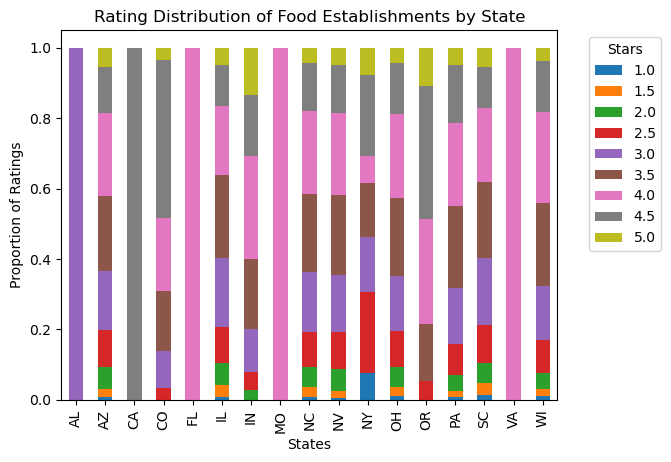

In [31]:
# filter food establishments with different keywords like food, restaurant, grill
food_establishments_df = yelp_business_df[yelp_business_df['categories'].str.lower().str.contains('food|restaurants|kitchen|grill', na=False)]

# grouping by states
grouped_by_state = food_establishments_df.groupby('state')

# calculate the rating distribution for each state and if there is null it is filled with 0
rating_distribution_by_state = grouped_by_state['stars'].value_counts(normalize=True).unstack().fillna(0)

# visualizing the distributions with a single using bar graph
plt.figure(figsize=(40, 40))
ax = rating_distribution_by_state.plot(kind='bar', stacked=True)
plt.title('Rating Distribution of Food Establishments by State')
plt.xlabel('States')
plt.ylabel('Proportion of Ratings')

# placing the legend outside the graph for better visuability
plt.legend(title='Stars', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


From the above plot we could see that  Florida(FL), Missouri(MO), Virginia(VA) is completely having 4 star hotels. While Alaska(AL) is having onmly 3 star hotels and California(CA) is having 4.5 star hotels.

Yes there is difference in the rating distribution (stars) of food establishments
by state. 

## Question 3

**Investigate differences in food establishments with/without a Happy Hour
using an appropriate visualization.**

In [32]:
food_establishments_df['attributes.HappyHour'].value_counts()

attributes.HappyHour
True     4003
False     624
Name: count, dtype: int64

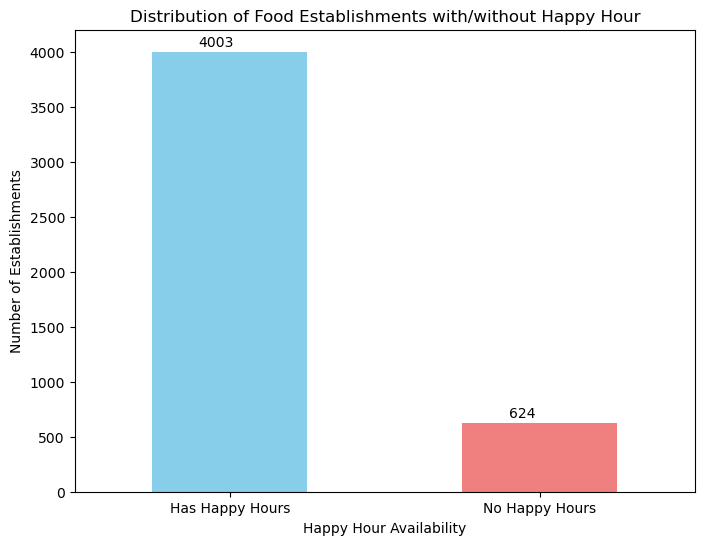

In [33]:


# Taking the counts of the food establishments with happy hour.
happy_hour_counts = food_establishments_df['attributes.HappyHour'].value_counts()

# Plotting the bar chart with count labels
plt.figure(figsize=(8, 6))
bars = happy_hour_counts.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Distribution of Food Establishments with/without Happy Hour')
plt.xlabel('Happy Hour Availability')
plt.ylabel('Number of Establishments')
plt.xticks([0, 1], ['Has Happy Hours', 'No Happy Hours'], rotation=0)

# adding count labels on top of each bar
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 50, str(int(bar.get_height())), color='black')

plt.show()


From the above graph we could see that there a total of 4003 food establishments with the happy hours and 624 food establishments have no happy hours.

/Users/avss/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/avss/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/avss/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/Users/avss/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  

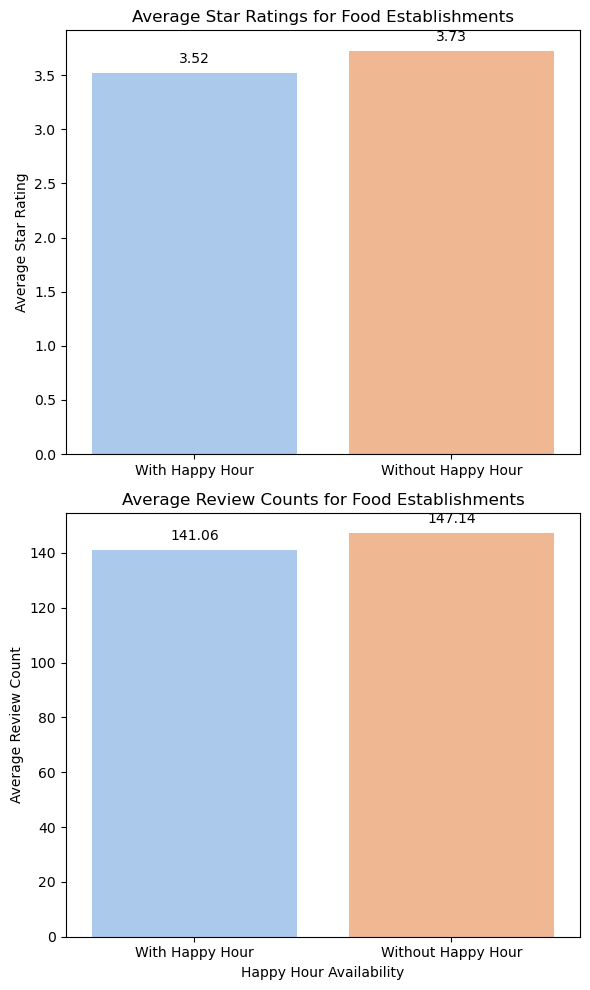

In [34]:
# taking the happy hour establishments and non happy hour establishments to separate dfs

happy_hour_df = food_establishments_df[food_establishments_df['attributes.HappyHour'] == True]
no_happy_hour_df = food_establishments_df[food_establishments_df['attributes.HappyHour'] == False]

# calculate average star ratings and review counts
avg_star_happy_hour = happy_hour_df['stars'].mean()
avg_star_no_happy_hour = no_happy_hour_df['stars'].mean()

avg_review_count_happy_hour = happy_hour_df['review_count'].mean()
avg_review_count_no_happy_hour = no_happy_hour_df['review_count'].mean()

plt.figure(figsize=(6,10))

# Set custom colors
colors = sns.color_palette("pastel")

# Plotting the comparison
plt.subplot(2, 1, 1)
ax1 = sns.barplot(x=['With Happy Hour', 'Without Happy Hour'], y=[avg_star_happy_hour, avg_star_no_happy_hour], palette=colors)
plt.title('Average Star Ratings for Food Establishments')
plt.ylabel('Average Star Rating')

# Display count values on top of each bar
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.subplot(2, 1, 2)
ax2 = sns.barplot(x=['With Happy Hour', 'Without Happy Hour'], y=[avg_review_count_happy_hour, avg_review_count_no_happy_hour], palette=colors)
plt.title('Average Review Counts for Food Establishments')
plt.xlabel('Happy Hour Availability')
plt.ylabel('Average Review Count')

# Display count values on top of each bar
for p in ax2.patches:
    ax2.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()


From the above we could see that food establishments irrespective of their happy hour availablility, food establishments have almost same average star rating and average revies count.

## Quetion 4

**Suppose you work at Yelp. You have been tasked with a new initiative to
create a new award for the highest performing food establishments
represented on the Yelp platform. The team at Yelp has determined that any
food establishment that has both the highest stars rating AND the largest
total number of reviews (review_count) in their city deserves the Best Local
Food Establishment Award. You have been tasked with writing Python code
that can determine which food establishments in a dataset deserve this new
prestigious award.**  
(Important Note: There are some slight variations in some city names like: LasVegas, Las
Vegas, las vegas. You do not need to worry about cleaning this up before performing
your analysis, this is really a proof-of-concept for your team. Also, some cities will have
no food establishments that deserve to receive this award as it is possible that the food
establishment with the largest number of reviews does not have the highest rating in the
city.)

In [35]:
#sorting the food_establishments_df data by city,stars and review count within each city group
sorted_food_establishments = food_establishments_df.sort_values(['city', 'stars', 'review_count'], ascending=[True, False, False])

#dropping the duplicate rows to keep only the top business for each city
best_local_food_establishments = sorted_food_establishments.drop_duplicates('city')

# resetting the index
best_local_food_establishments = best_local_food_establishments.reset_index(drop=True)

# Display the results
best_local_food_establishments[['name', 'city', 'stars', 'review_count']]


,name,city,stars,review_count
0,Cupz N' Crepes,Ahwatukee,4.0,283
1,Wildwood Golf Club,Allison Park,5.0,3
2,Blue Canary Coffeehouse,Ambridge,5.0,12
3,Polansky Steve Market,Amherst,5.0,9
4,KaleidoScoops Ice Cream,Anthem,4.5,21
5,Argos Bar & Grill,Argos,4.5,3
6,Bamboo Republic,Arnold,4.5,42
7,Aspinwall Beans 'N' Cream,Aspinwall,4.5,31
8,Sirna's Farm & Market,Auburn,5.0,4
9,Sirna's Pizza,Auburn Township,4.5,24


The above is the list of top performing food establishment of each state ranked with highest ratinge and largest number of reviews in their cities.


## Question 5

**Do reviews with exclamation points seem to be either very highly
rated or very low rated? Determine the stars distribution as a function
of the number of exclamation points used in the review. Draw a
suitable plot.**

In [36]:
yelp_review_df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5996996 entries, 0 to 5996997
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   business_id  object 
 1   cool         int64  
 2   date         object 
 3   funny        float64
 4   review_id    object 
 5   stars        float64
 6   text         object 
 7   useful       float64
 8   user_id      object 
dtypes: float64(3), int64(1), object(5)
memory usage: 457.5+ MB


/var/folders/b6/c0ss6qd57xn3q3cgmnx4pxy40000gn/T/ipykernel_3768/3394465066.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yelp_review_df1['num_exclamation_points'] = yelp_review_df1['text'].str.count('!')
posx and posy should be finite values
posx and posy should be finite values


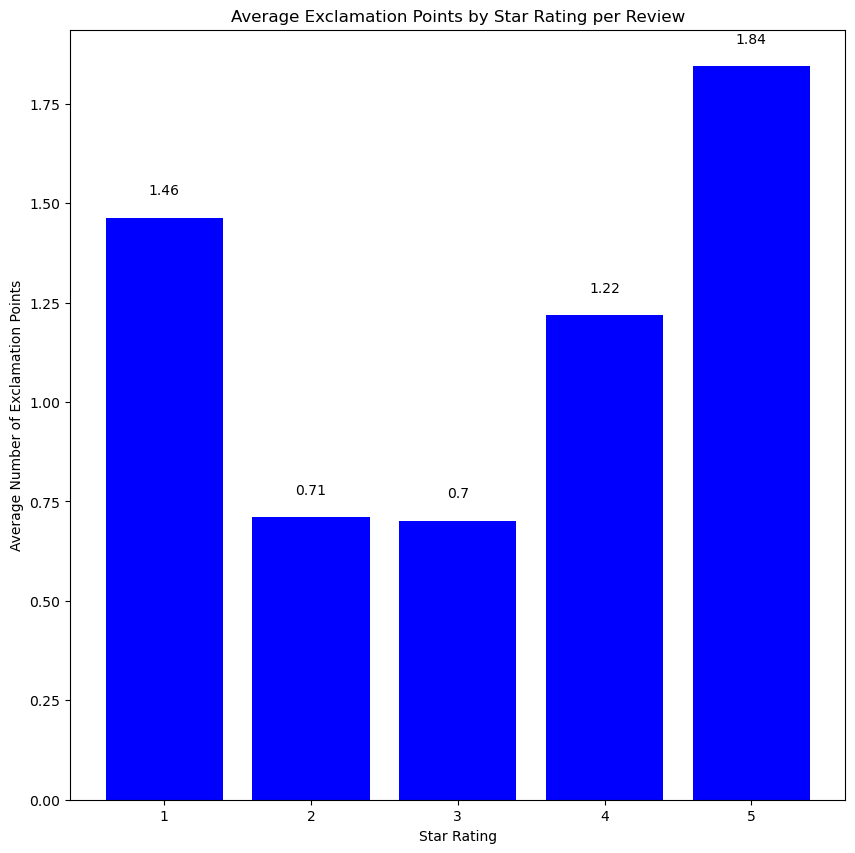

In [37]:

# calculating the number of exclamation points in each review and adding to a new column in the same record.
yelp_review_df1['num_exclamation_points'] = yelp_review_df1['text'].str.count('!')

# calculating the average number of exclamation points by star rating
exclamation_avg = yelp_review_df1.groupby('stars')['num_exclamation_points'].mean()

#plotting a bar graph to visualize the results
plt.figure(figsize=(10, 10))
bars = plt.bar(exclamation_avg.index, exclamation_avg, color='blue')
plt.xlabel('Star Rating')
plt.ylabel('Average Number of Exclamation Points')
plt.title('Average Exclamation Points by Star Rating per Review')

# Adding bar values values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha='center', va='bottom')

plt.show()


As per the above graph we could see that the highest average number of exclamation points have the highest star rating. Also note that lowest star rating is having the second highest number of exclamation points. The other averege number of exclamation points have star ratings between highest and the lowest star ratings.

So we can conclude that reviews with exclamation points seem to be either very highly rated or very low rated, which represents either the customer is highly satisfied or fully frustated with the establishment!!

In [38]:
#importing yelp_academic_dataset_user dataset
yelp_user_df = pd.read_csv('yelp_academic_dataset_user.csv')

In [39]:
yelp_user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1518169 entries, 0 to 1518168
Data columns (total 22 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   average_stars       1518169 non-null  float64
 1   compliment_cool     1518169 non-null  int64  
 2   compliment_cute     1518169 non-null  int64  
 3   compliment_funny    1518169 non-null  int64  
 4   compliment_hot      1518169 non-null  int64  
 5   compliment_list     1518169 non-null  int64  
 6   compliment_more     1518169 non-null  int64  
 7   compliment_note     1518169 non-null  int64  
 8   compliment_photos   1518169 non-null  int64  
 9   compliment_plain    1518169 non-null  int64  
 10  compliment_profile  1518169 non-null  int64  
 11  compliment_writer   1518169 non-null  int64  
 12  cool                1518169 non-null  int64  
 13  elite               67109 non-null    object 
 14  fans                1518169 non-null  int64  
 15  friends        

In [40]:
yelp_user_df.head(5)

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,compliment_profile,compliment_writer,cool,elite,fans,friends,funny,name,review_count,useful,user_id,yelping_since
0,2.00,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,0,Susan,1,0,lzlZwIpuSWXEnNS91wxjHw,2015-09-28
1,5.00,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,0,Daipayan,2,0,XvLBr-9smbI0m_a7dXtB7w,2015-09-05
2,4.00,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,0,Andy,1,0,QPT4Ud4H5sJVr68yXhoWFw,2016-07-21
3,4.05,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,0,Jonathan,19,0,i5YitlHZpf0B3R0s_8NVuw,2014-08-04
4,3.00,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,0,Shashank,3,0,s4FoIXE_LSGviTHBe8dmcg,2017-06-18


The above mentioned information is the basic information regarding the third dataset Yelp_academic_user dataset. There are a total of 1518169 records with 22 columns.

In the sample data we could see that compliment column is splited into multiple columns with each category as a column, which is know as One-hot encoding.